In [76]:
import requests

url = "http://hackathon.siim.org/fhir/Patient"

payload  = {}
headers = {
  'apikey': 'd5e7be37-a348-4669-b024-6bd2005c1292'
}

response = requests.request("GET", url, headers=headers, data = payload)

#print(response.text.encode('utf8'))
print(response.text, ": ", response.status_code)

{
  "resourceType": "Bundle",
  "id": "bd6f2d19-f0f0-4a6a-bd85-14c9f816f47a",
  "meta": {
    "lastUpdated": "2020-06-22T12:36:09.100-04:00"
  },
  "type": "searchset",
  "total": 6,
  "link": [
    {
      "relation": "self",
      "url": "http://hackathon.siim.org/fhir-overview/fhir/Patient"
    }
  ],
  "entry": [
    {
      "fullUrl": "http://hackathon.siim.org/fhir-overview/fhir/Patient/siimjoe",
      "resource": {
        "resourceType": "Patient",
        "id": "siimjoe",
        "meta": {
          "versionId": "1",
          "lastUpdated": "2020-06-22T03:00:37.442-04:00"
        },
        "text": {
          "status": "generated",
          "div": "<div xmlns=\"http://www.w3.org/1999/xhtml\">\r\n  <table>\r\n    <tbody>\r\n      <tr>\r\n        <td>Name</td>\r\n        <td>Jim <b>SIIM</b></td>\r\n      </tr>\r\n      <tr>\r\n        <td>Address</td>\r\n        <td>534 Erewhon, Pleasantville, Vic, 3999</td>\r\n      </tr>\r\n      <tr>\r\n        <td>Contacts</td>\r\n       

In [77]:
url = "http://hackathon.siim.org/fhir/Patient"
API_ENDPOINT = "http://hackathon.siim.org/fhir/Patient"
API_KEY = "d5e7be37-a348-4669-b024-6bd2005c1292"
HEADERS = {'content-type' : 'application/json', 'apikey' : API_KEY}

test_numbers = {'Joe' : "(035) 555 6473",
                'Andy' : "(507) 555 6473"}

def getPatientResourceByField(url, headers, field, value):
    data = {'Accept' : 'application/json'}
    url += ("?" + field + "=" + value)
    response = requests.get(url=url, headers=headers)
    
    print("url : " + str(url))
    print("headers : " + str(headers))
    return response

response = getPatientResourceByField(url, headers, "_id", 'siimjoe')
#print(response.text, ": ", response.status_code)

url : http://hackathon.siim.org/fhir/Patient?_id=siimjoe
headers : {'apikey': 'd5e7be37-a348-4669-b024-6bd2005c1292'}


In [26]:
print(response.text, ": ", response.status_code)

{
  "resourceType": "Bundle",
  "id": "454ce2be-3ed5-4e65-943b-959cebdc835a",
  "meta": {
    "lastUpdated": "2020-06-21T10:39:04.488-04:00"
  },
  "type": "searchset",
  "total": 1,
  "link": [
    {
      "relation": "self",
      "url": "http://hackathon.siim.org/fhir-overview/fhir/Patient?_id=siimjoe"
    }
  ],
  "entry": [
    {
      "fullUrl": "http://hackathon.siim.org/fhir-overview/fhir/Patient/siimjoe",
      "resource": {
        "resourceType": "Patient",
        "id": "siimjoe",
        "meta": {
          "versionId": "1",
          "lastUpdated": "2020-06-21T03:00:37.527-04:00"
        },
        "text": {
          "status": "generated",
          "div": "<div xmlns=\"http://www.w3.org/1999/xhtml\">\r\n  <table>\r\n    <tbody>\r\n      <tr>\r\n        <td>Name</td>\r\n        <td>Jim <b>SIIM</b></td>\r\n      </tr>\r\n      <tr>\r\n        <td>Address</td>\r\n        <td>534 Erewhon, Pleasantville, Vic, 3999</td>\r\n      </tr>\r\n      <tr>\r\n        <td>Contacts</td

In [78]:
i = 0
for thing in response:
    i += 1
    
print(i)

print(response.apparent_encoding)
#print(response.content)

i = 0
for thing in response.content:
    i += 1
    
patient_info = response.json()
print(patient_info['id'])
print(patient_info['entry'][0].keys())
print(patient_info['entry'][0]['resource']['name'][0]['given'][0])
#patient_info
#patient_info['name']
### Now what
# Create page that says Hello, Person, when would you like to make your appointment?
## Calendar Time
### Then get date and time and create appointment in fhir

27
utf-8
59dce102-bc63-4cf2-bdbe-d5c1aa6c71a6
dict_keys(['fullUrl', 'resource', 'search', 'response'])
Joe


In [88]:
import os
import json

def getJsonTemplate():
    
    with open(r'C:\Users\Peter\Desktop\SIIMHackathon\appointment-example.json') as f:
        template = json.load(f)

    return template

template = getJsonTemplate()
template

{'resourceType': 'Appointment',
 'id': 'example',
 'text': {'status': 'generated',
  'div': '<div xmlns="http://www.w3.org/1999/xhtml">Brian MRI results discussion</div>'},
 'status': 'booked',
 'serviceCategory': [{'coding': [{'system': 'http://example.org/service-category',
     'code': 'gp',
     'display': 'General Practice'}]}],
 'serviceType': [{'coding': [{'code': '52',
     'display': 'General Discussion'}]}],
 'specialty': [{'coding': [{'system': 'http://snomed.info/sct',
     'code': '394814009',
     'display': 'General practice'}]}],
 'appointmentType': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/v2-0276',
    'code': 'FOLLOWUP',
    'display': 'A follow up visit from a previous appointment'}]},
 'reasonReference': [{'reference': 'Condition/example',
   'display': 'Severe burn of left ear'}],
 'priority': 5,
 'description': 'Discussion on the results of your recent MRI',
 'start': '2013-12-10T09:00:00Z',
 'end': '2013-12-10T11:00:00Z',
 'created': '2013-10

In [97]:
import datetime

print(template.keys())
print('\n')
print(template['text'].keys())
print('\n')
print(template['serviceType'])
print('\n')
print(template['participant'])
print(datetime.date())


dict_keys(['resourceType', 'id', 'text', 'status', 'serviceCategory', 'serviceType', 'specialty', 'appointmentType', 'reasonReference', 'priority', 'description', 'start', 'end', 'created', 'comment', 'basedOn', 'participant', 'meta'])


dict_keys(['status', 'div'])


[{'coding': [{'code': '52', 'display': 'General Discussion'}]}]


[{'actor': {'reference': 'Patient/example', 'display': 'Peter James Chalmers'}, 'required': 'required', 'status': 'accepted'}, {'type': [{'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/v3-ParticipationType', 'code': 'ATND'}]}], 'actor': {'reference': 'Practitioner/example', 'display': 'Dr Adam Careful'}, 'required': 'required', 'status': 'accepted'}, {'actor': {'reference': 'Location/1', 'display': 'South Wing, second floor'}, 'required': 'required', 'status': 'accepted'}]


TypeError: function missing required argument 'year' (pos 1)

In [290]:
APPOINTMENT_URL = "http://hackathon.siim.org/fhir/Appointment"

response = requests.request("GET", APPOINTMENT_URL, headers=headers, data = payload)

i = 0
json_appts = response.json()

for thing in json_appts['entry']:
    i += 1
    print(thing)
    print('\n\n\n\n')
    
print(i)

{'fullUrl': 'http://hackathon.siim.org/fhir-overview/fhir/Appointment/149', 'resource': {'resourceType': 'Appointment', 'id': '149', 'meta': {'versionId': '1', 'lastUpdated': '2020-06-22T18:24:57.342-04:00'}, 'status': 'booked', 'description': 'Covid-19 Immunization, Adams', 'start': '2020-12-10T07:00:00Z', 'created': '2020-12-10', 'participant': [{'actor': {'reference': 'Patient/e010463e-d023-4d86-be4e-e20f3cb3c11c', 'display': 'Joe'}, 'required': 'required', 'status': 'accepted'}]}, 'search': {'mode': 'match'}, 'response': {'status': '201 Created', 'etag': 'W/"1"'}}





1


In [ ]:
BASE_URL = 'https://npiregistry.cms.hhs.gov/'

def getFunction(base_url=BASE_URL, url_extension):
    
    response = requests.request("GET", BASE_URL + url_extension, headers=HEADERS)
    return response

getFunction('api/?version=2.1&city=baltimore')

In [299]:
### Put you url here
APPOINTMENT_URL = "http://hackathon.siim.org/fhir/Appointment"
HEADERS = {'content-type' : 'application/json', 'apikey' : API_KEY}

def getAppointments(printable=True):

    response = requests.request("GET", APPOINTMENT_URL, headers=HEADERS)

    appts_json = response.json()

    appts_info = []

    days = {0 : 'Monday',
            1 : 'Tuesday',
            2 : 'Wednesday' ,
            3 : 'Thursday',
            4 : 'Friday'}

    # Catch case of no appointments
    try:
        for entry in appts_json['entry']:
            if printable:
                appts_info.append('Name : ' + str(appt['resource']['participant'][0]['actor']['display']) +
                                    ', County : ' + str(appt['resource']['description'][23:]) +
                                    ', Day : ' + str(days[int(appt['resource']['start'][9])]) + 
                                    ', Time : ' + str(appt['resource']['start'][11:16]))
            else:                  
                appts_info.append([appt['resource']['participant'][0]['actor']['display'],
                                    appt['resource']['description'][23:],
                                    days[int(appt['resource']['start'][9])],
                                    appt['resource']['start'][11:16]])
    except:
        return appts_info

    return appts_info
getAppointments()

['Name : Joe, County : Adams, Day : Monday, Time : 07:00']

In [300]:
response = requests.request("GET", APPOINTMENT_URL, headers=HEADERS)

appts_json = response.json()

lenappts_json['entry']

NameError: name 'lenappts_json' is not defined

In [255]:
import requests

url = "http://hackathon.siim.org/fhir/Appointment"

payload = "{\"resourceType\": \"Appointment\",\r\n \"id\": \"example\",\r\n \"status\": \"booked\",\r\n \"description\": \"Covid-19 Immunization - Filler County Name2\",\r\n \"start\": \"2013-12-10T09:00:00Z\",\r\n \"created\": \"2013-10-10\",\r\n \"participant\": [{\"actor\": {\"reference\": \"Patient/example\",\r\n    \"display\": \"Peter James Chalmers\"},\r\n   \"required\": \"required\",\r\n   \"status\": \"accepted\"}]}"
headers = {
  'apikey': 'd5e7be37-a348-4669-b024-6bd2005c1292',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data = payload)

#print(response.text.encode('utf8'))


In [234]:
import requests

url = "http://hackathon.siim.org/fhir/Appointment"

#payload = "{\"resourceType\": \"Appointment\",\r\n \"id\": \"example\",\r\n \"status\": \"booked\",\r\n \"description\": \"Covid-19 Immunization - Filler County Name\",\r\n \"start\": \"2013-12-10T15:00:00Z\",\r\n \"created\": \"2013-10-10\",\r\n \"participant\": [{\"actor\": {\"reference\": \"Patient/example\",\r\n    \"display\": \"Peter James Chalmers\"},\r\n   \"required\": \"required\",\r\n   \"status\": \"accepted\"}]}"
headers = {
  'apikey': 'd5e7be37-a348-4669-b024-6bd2005c1292',
  'Content-Type': 'application/json'
}

response = requests.request("GET", url, headers=headers)

filled_appts = []
json_appts = response.json()
#print(json_appts.keys())
for entry in json_appts['entry']:
    filled_appts.append(entry['resource']['start'])

print(filled_appts)

['2013-12-10T09:00:00Z', '2020-12-11T07:30:00Z', '2020-12-13T11:00:00Z', '2013-12-10T15:00:00Z', '2020-12-11T08:00:00Z']


In [229]:
times = ['07:00', '07:30', '08:00', '08:30', '09:00',
                '09:30', '10:00', '10:30', '11:00', '11:30',
                '12:00', '12:30', '13:00', '13:30', '14:00',
                '14:30', '15:00', '15:30', '16:00', '16:30',
                '17:00', '17:30']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

for i, day in enumerate(days):
    print(i)
    print(day)

0
Monday
1
Tuesday
2
Wednesday
3
Thursday
4
Friday


In [ ]:
response = requests.request("GET", "http://hackathon.siim.org/fhir/Appointment", headers=HEADERS)
json_appts = response.json()

filled_appts = []

In [240]:
HEADERS = {'content-type' : 'application/json', 'apikey' : API_KEY}

def getOpenAppointments(day):

    response = requests.request("GET", "http://hackathon.siim.org/fhir/Appointment", headers=HEADERS)
    json_appts = response.json()

    filled_appts = []

    days = {'Monday' : 0,
            'Tuesday' : 1,
            'Wednesday' : 2,
            'Thursday' : 3,
            'Friday' : 4}

    for entry in json_appts['entry']:
        appt_datetime = entry['resource']['start']

        print(appt_datetime[9])
        print(days[day])
        if int(appt_datetime[9]) == int(days[day]):
            print('here')
            print(appt_datetime[11:16])
            filled_appts.append(appt_datetime[11:16])

            
    times = ['07:00', '07:30', '08:00', '08:30', '09:00',
                '09:30', '10:00', '10:30', '11:00', '11:30',
                '12:00', '12:30', '13:00', '13:30', '14:00',
                '14:30', '15:00', '15:30', '16:00', '16:30',
                '17:00', '17:30']

    for appt in filled_appts:
        times.remove(appt)
    
    return times

getOpenAppointments('Monday')

0
0
here
09:00
1
0
3
0
0
0
here
15:00
1
0


['07:00',
 '07:30',
 '08:00',
 '08:30',
 '09:30',
 '10:00',
 '10:30',
 '11:00',
 '11:30',
 '12:00',
 '12:30',
 '13:00',
 '13:30',
 '14:00',
 '14:30',
 '15:30',
 '16:00',
 '16:30',
 '17:00',
 '17:30']

In [269]:
response = requests.request("GET", APPOINTMENT_URL, headers=HEADERS)
appts_json = response.json()

for appt in appts_json['entry']:
    #print(appt['resource'].keys())
    #print(appt['resource'])
    print(appt['resource']['participant'][0]['actor']['display'])
    print(appt['resource']['description'][23:])
    print(appt['resource']['start'][9])
    print(appt['resource']['start'][11:16])
    break

Joe
Adams
0
07:00


In [147]:
response = requests.request("GET", APPOINTMENT_URL, headers=headers, data = payload)
json_appts['total']

6

In [302]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Collecting pandas



In [310]:
import pandas as pd

## Sources for covid-19 in case we lose them
# https://data.dhsgis.wi.gov/datasets/covid-19-historical-data-table/data?where=%20(GEO%20%3D%20%27County%27%20OR%20GEO%20%3D%20%27State%27)%20
# https://www.dhs.wisconsin.gov/publications/p02677.pdf

## Source for population by county
# https://www.wisconsin-demographics.com/counties_by_population

df = pd.read_csv(r'C:\Users\Peter\Desktop\SIIMHackathon\COVID-19_Historical_Data_Table_3.csv')
df.head()

,OBJECTID,GEOID,GEO,NAME,LoadDttm,NEGATIVE,POSITIVE,HOSP_YES,HOSP_NO,HOSP_UNK,...,DTH_E_NHSP,DTH_E_UNK,POS_HC_Y,POS_HC_N,POS_HC_UNK,DTH_NEW,POS_NEW,NEG_NEW,TEST_NEW,DATE
0,1,55,State,WI,2020/03/15 19:00:00+00,313.0,32,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020/03/15 14:00:00+00
1,2,55001,County,Adams,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020/03/15 14:00:00+00
2,3,55003,County,Ashland,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020/03/15 14:00:00+00
3,4,55005,County,Barron,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020/03/15 14:00:00+00
4,5,55007,County,Bayfield,2020/03/15 19:00:00+00,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020/03/15 14:00:00+00


In [376]:
import datetime

print(df.shape) # 7300 rows
print(df['NAME'].value_counts()) # 73 counties, so 100 data points

dates = df['LoadDttm'].value_counts().index
#sorted(d, key=lambda x: datetime.datetime.strptime(x, '%m-%Y'))

dates[0].split()[0]
sorted_dates = [date.split()[0] for date in dates] # why are there times even
sorted_dates = sorted(dates2, key=lambda x: datetime.datetime.strptime(x, '%Y/%m/%d'))

print('First five : ' + str(sorted_dates[0:5])) # all that to find out there's one per day for a hundred days
print('Last five : ' + str(sorted_dates[-5:]))

(7300, 104)
Barron      100
Buffalo     100
Jackson     100
Taylor      100
Polk        100
           ... 
Washburn    100
Calumet     100
Wood        100
Sawyer      100
Adams       100
Name: NAME, Length: 73, dtype: int64
First five : ['2020/03/15', '2020/03/16', '2020/03/17', '2020/03/18', '2020/03/19']
Last five : ['2020/06/18', '2020/06/19', '2020/06/20', '2020/06/21', '2020/06/22']


In [346]:
# We have our SIR, susceptible is WISCONSIN_POP - 
data = df[['NAME', 'LoadDttm',  'POSITIVE']]
data.head()
## Note that WI is for all of wisconsin

,NAME,LoadDttm,POSITIVE
0,WI,2020/03/15 19:00:00+00,32
1,Adams,2020/03/15 19:00:00+00,0
2,Ashland,2020/03/15 19:00:00+00,0
3,Barron,2020/03/15 19:00:00+00,0
4,Bayfield,2020/03/15 19:00:00+00,0


In [341]:
df2 = pd.read_csv(r'C:\Users\Peter\Desktop\SIIMHackathon\wisconsin_pop_by_county.txt')
print(df2.shape)
df2.head()

(72, 3)


,County,Population,Area(sqmi)
0,Milwaukee,954209,241.40
1,Dane,529843,1197.24
2,Waukesha,398879,549.57
3,Brown,259786,529.71
4,Racine,195398,332.50


In [362]:
print(df2[df2['County'] == 'Dane']['Population'].values[0])
print(df2['County'].value_counts().index)

529843
Index(['Waushara', 'Crawford', 'Wood', 'Monroe', 'Waupaca', 'Ashland',
       'Barron', 'Menominee', 'Winnebago', 'Bayfield', 'Vilas', 'Douglas',
       'Sheboygan', 'Manitowoc', 'Fond du Lac', 'Milwaukee', 'Portage',
       'Pepin', 'Taylor', 'Grant', 'Green', 'Columbia', 'Rusk', 'Vernon',
       'St. Croix', 'Lafayette', 'Kenosha', 'La Crosse', 'Chippewa', 'Iowa',
       'Florence', 'Walworth', 'Clark', 'Racine', 'Richland', 'Jefferson',
       'Brown', 'Dunn', 'Door', 'Kewaunee', 'Washington', 'Trempealeau',
       'Sauk', 'Marinette', 'Oconto', 'Dodge', 'Adams', 'Marathon',
       'Green Lake', 'Juneau', 'Ozaukee', 'Lincoln', 'Langlade', 'Iron',
       'Waukesha', 'Dane', 'Price', 'Washburn', 'Outagamie', 'Rock', 'Jackson',
       'Shawano', 'Oneida', 'Sawyer', 'Forest', 'Calumet', 'Polk', 'Pierce',
       'Marquette', 'Burnett', 'Eau Claire', 'Buffalo'],
      dtype='object')


In [371]:
data.loc[df['NAME'] == 'Waushara', 'Population']

70      7
143     7
216     7
289     7
362     7
       ..
6965    7
7039    7
7113    7
7186    7
7258    7
Name: Population, Length: 100, dtype: int64

In [375]:
data = data.drop(data[data['NAME'] == 'WI'].index)
data['Population'] = 0
data['Area'] = 0

for county in df2['County'].value_counts().index:
    data.loc[df['NAME'] == county, 'Population'] = df2[df2['County'] == county]['Population'].values[0]
    data.loc[df['NAME'] == county, 'Area'] = df2[df2['County'] == county]['Area(sqmi)'].values[0]

#data[data['NAME'] == '']
data

,NAME,LoadDttm,POSITIVE,Population,Area
1,Adams,2020/03/15 19:00:00+00,0,20073,645.65
2,Ashland,2020/03/15 19:00:00+00,0,15712,1045.04
3,Barron,2020/03/15 19:00:00+00,0,45252,862.71
4,Bayfield,2020/03/15 19:00:00+00,0,14992,1477.86
5,Brown,2020/03/15 19:00:00+00,0,259786,529.71
...,...,...,...,...,...
7294,Waukesha,2020/06/22 12:12:58+00,1015,398879,549.57
7295,Racine,2020/06/22 12:12:58+00,2090,195398,332.50
7296,Brown,2020/06/22 12:12:58+00,2581,259786,529.71
7297,Dane,2020/06/22 12:12:58+00,1139,529843,1197.24


In [378]:
pip install matplotlib


  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


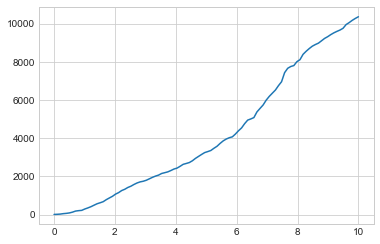

In [383]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, data[data['NAME'] == 'Milwaukee']['POSITIVE'].values);

In [ ]:
# Gotta calculate things to find how many people saved from the covid with each vaccination

In [ ]:
# Put Population for county into corresponding rows, then each row has an S and an I
# Then we can calculate the infection rate relative to them for each county?
# Then we can calculate the the change in infected/infection rate for a single unit in S
# Then slap that onto the end of the make appointment thing, 'You're saving 0.4 people from Covid-19.'

In [134]:
# Ignore below thing, misinterpreted what required meant

# Fields we need
## Time, participant

In [ ]:
# Required by Fhir
## Participant
## Type
## Actor

# Required for our use
## Start, maybe end too

# Would be nice
## Priority
## Description
## Appointment Type, maybe

In [ ]:
#### What we need
# Patient Appointment Creator
## Via in person arrival and via phone
### Probably scratch that actually
### Instead need pages for check in where we get handed patient id to make appointment
### and page to get contact info to get patient id that goes to first page
### Ideally appointment page would have a calendar patients could pick appointments from

# Patient Appointment Checker
## Look at a calendar view of appointments maybe?
## Should be able to change appointment status to checked in and to remove appointment if no show

### Main functions
# Make appointment with patient id and appointment time
# Find patient via contact
# Change appointment status / remove appointment

### What we don't need
# Registration
## Remote registration group is doing that, if we're using tablets we can use that to register as well
## Not sure if we would want people on site to register patients? Then we would need a separate registration process maybe

# Next up we want to find patients by phone numbers
# Gotta find case where there is no patient with a phone number and case where there is one, drop case with two
# Gotta search appointments to make sure patients don't double up

# https://github.com/Syniverse/Example-2WaySMS-TextBot-Python/blob/master/textbot_flask_app.py
# https://sdcsupport.syniverse.com/hc/en-us/articles/115004525753-Creating-an-SMS-Chatbot-using-2-way-SMS